In [78]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from string import Template
import json
import sys 
sys.path.append('..')
# coEgoNetworks
import src.coegonets as cnets
import src.notebook as nb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# load javascripts 
HTML('''<script src="./sigma.min.js"></script>
<script src="./sigma.layout.forceAtlas2.min.js"></script>
<script src="./sigma.renderers.snapshot.min.js"></script>
<script src="./sigma.exporters.svg.min.js"></script>''')

In [80]:
STYLE='bmh'
plt.style.use(STYLE)
font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7

In [81]:
#Load Data
DATA_PATH="../DATA/pkl/wellness_all.gz"
C = cnets.getDF(path=DATA_PATH)


Text(0.5, 0.98, 'Top 20 Hashtag Frequency')

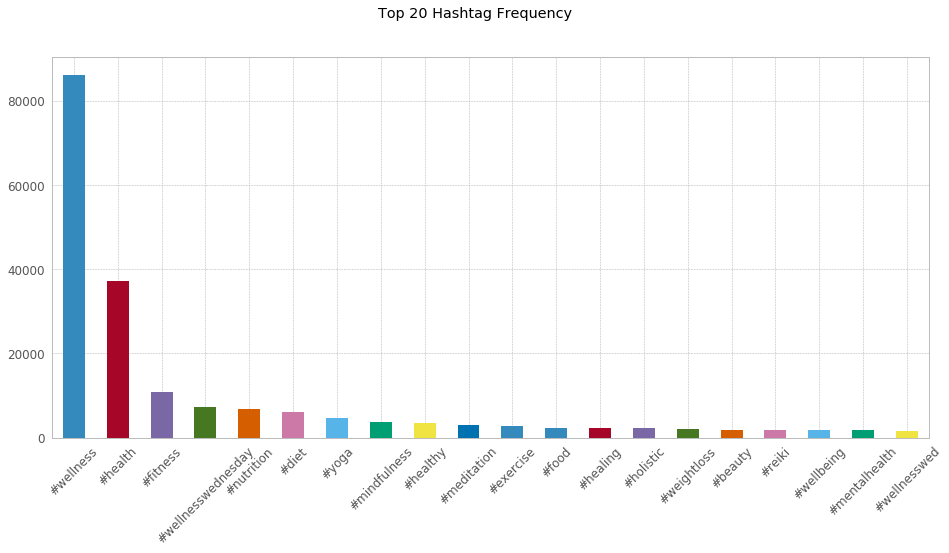

In [82]:
#top K occurrences
K=20
oc = nb.top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, '#wellness: top 20 coocurrences')

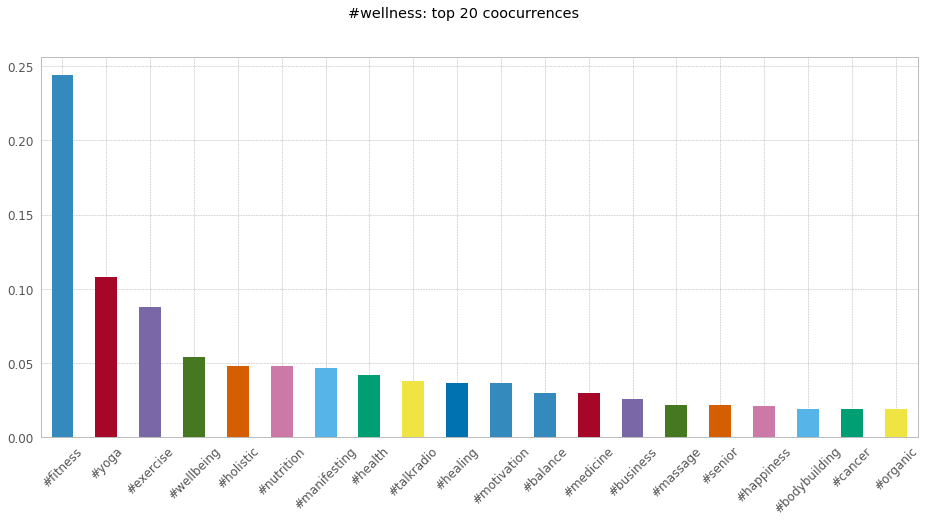

In [83]:
#top K co-occurrences
target_word = "#wellness"
cooc = nb.top_k_cooc(C,target_word,K, True)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [94]:
#plot network for top K words
top_words = list(cooc.keys())
g = nb.graph(C, top_words, style=STYLE) 
HTML(nb.getSigmaGraph(g, html_container_id="c") ) 